## Import Library

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# Import library untuk menangani file dan dataset
import os  # Untuk manipulasi path file
import shutil  # Untuk menyalin file
import zipfile  # Untuk mengekstrak file ZIP
import random  # Untuk operasi acak
from random import sample  # Untuk memilih sampel acak
import pathlib  # Untuk bekerja dengan path file
from pathlib import Path  # Untuk manipulasi path secara lebih efisien

# Import library untuk pemrosesan gambar
import cv2  # Untuk manipulasi gambar menggunakan OpenCV
from PIL import Image  # Untuk memuat dan memanipulasi gambar
import skimage  # Untuk pemrosesan gambar lebih lanjut
from skimage import io  # Untuk membaca gambar menggunakan skimage
from skimage.transform import resize  # Untuk meresize gambar
from skimage.transform import rotate, AffineTransform, warp  # Untuk transformasi gambar
from skimage import img_as_ubyte  # Untuk mengubah gambar ke format byte
from skimage.exposure import adjust_gamma  # Untuk mengatur gamma (kecerahan)
from skimage.util import random_noise  # Untuk menambahkan noise pada gambar

# Import library untuk TensorFlow dan Keras
import tensorflow as tf  # Untuk framework TensorFlow
from tensorflow.keras import Model, layers  # Untuk membangun model Keras
from tensorflow.keras.preprocessing import image  # Untuk memuat dan memproses gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  # Untuk augmentasi dan pemrosesan gambar
from tensorflow.keras.optimizers import Adam, RMSprop, SGD  # Untuk optimisasi model
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D  # Untuk lapisan-lapisan dalam CNN
from tensorflow.keras.applications import MobileNet  # Untuk menggunakan model MobileNet
from tensorflow.keras.models import Sequential, Model  # Untuk membangun model Keras
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau  # Untuk callback saat pelatihan

# Library untuk evaluasi model
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi train dan test
from sklearn.metrics import confusion_matrix, classification_report  # Untuk evaluasi model

# Library tambahan untuk YOLOv8
from ultralytics import YOLO  # Menggunakan YOLOv8 dari ultralytics


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Upload Data dari Kaggle

In [19]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving coba1.jpg to coba1.jpg


{'coba1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x80\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d shlokraval/ppe-dataset-yolov8

Dataset URL: https://www.kaggle.com/datasets/shlokraval/ppe-dataset-yolov8
License(s): apache-2.0
 97% 2.27G/2.35G [00:16<00:02, 38.4MB/s]
100% 2.35G/2.35G [00:16<00:00, 156MB/s] 


In [13]:
!unzip ppe-dataset-yolov8.zip -d /content/ppe_dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/ppe_dataset/valid/labels/Nhh_img_81_jpg.rf.00246985c5c7ad8dc25b42da335983b9.txt  
  inflating: /content/ppe_dataset/valid/labels/OR-02-01-0743-26_l_jpg.rf.681a067704e99b34bb09070a0af0a889.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1021_jpg.rf.a81789c98569d276c7292e381d7f2b53.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1022_jpg.rf.75c748a8116491c04052cc101b2bbba5.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1030_jpg.rf.551edb6ab58a76f56302d6fd8c7ea2cd.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1035_jpg.rf.6ba4264d81ef95a06c1af4937e0da04b.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1037_jpg.rf.7b6eef01ad33a43772beaf9303bd13b6.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1045_jpg.rf.5a9d98d53ab9bf1ada473920e6fefd01.txt  
  inflating: /content/ppe_dataset/valid/labels/PP02img1047_jpg.rf.dcaeadb2b377f0ffa71dc5adb36d5

In [14]:
!ls /content/ppe_dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [15]:
!cat /content/ppe_dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 14
names: ['Fall-Detected', 'Gloves', 'Goggles', 'Hardhat', 'Ladder', 'Mask', 'NO-Gloves', 'NO-Goggles', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest']

roboflow:
  workspace: roboflow-universe-projects
  project: personal-protective-equipment-combined-model
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/personal-protective-equipment-combined-model/dataset/4

## Modeling dan Pelatihan YOLOv8

In [16]:
# Load model YOLOv8 pre-trained
model = YOLO('yolov8s.pt')

# Melatih model dengan dataset dan file data.yaml
model.train(
    data="/content/ppe_dataset/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ppe_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 26.0MB/s]

Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           


  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 804.3±427.9 MB/s, size: 50.9 KB)


train: Scanning /content/ppe_dataset/train/labels... 30765 images, 848 backgrounds, 0 corrupt: 100%|██████████| 30765/30765 [00:13<00:00, 2360.73it/s]


train: New cache created: /content/ppe_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1128.9±501.1 MB/s, size: 45.9 KB)


val: Scanning /content/ppe_dataset/valid/labels... 8814 images, 210 backgrounds, 0 corrupt: 100%|██████████| 8814/8814 [00:04<00:00, 1770.72it/s]


val: New cache created: /content/ppe_dataset/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.96G      1.612      2.251      1.441         20        640: 100%|██████████| 1923/1923 [09:48<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:30<00:00,  3.06it/s]


                   all       8814      22077      0.636      0.584      0.586      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.32G      1.548      1.368      1.389         23        640: 100%|██████████| 1923/1923 [09:27<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:29<00:00,  3.08it/s]


                   all       8814      22077      0.689      0.619      0.627      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.35G      1.523      1.282      1.375         19        640: 100%|██████████| 1923/1923 [09:22<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:28<00:00,  3.11it/s]


                   all       8814      22077      0.686      0.654      0.644      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.38G      1.478      1.185      1.345         17        640: 100%|██████████| 1923/1923 [09:24<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:31<00:00,  3.01it/s]


                   all       8814      22077      0.708      0.681      0.678        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.42G      1.434      1.092       1.31         32        640: 100%|██████████| 1923/1923 [09:29<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:31<00:00,  3.03it/s]


                   all       8814      22077      0.723      0.704      0.705      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.46G      1.394      1.027      1.287         41        640: 100%|██████████| 1923/1923 [09:25<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:29<00:00,  3.07it/s]


                   all       8814      22077      0.733      0.727      0.725      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.49G       1.36     0.9703      1.264         31        640: 100%|██████████| 1923/1923 [09:29<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:31<00:00,  3.01it/s]


                   all       8814      22077      0.687      0.768      0.738      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.53G      1.327     0.9175      1.243         30        640: 100%|██████████| 1923/1923 [09:33<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:30<00:00,  3.05it/s]


                   all       8814      22077      0.694      0.779      0.748      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.56G      1.293     0.8693      1.222         56        640: 100%|██████████| 1923/1923 [09:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:31<00:00,  3.03it/s]


                   all       8814      22077      0.719      0.783      0.761      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.59G      1.262     0.8268      1.204         47        640: 100%|██████████| 1923/1923 [09:30<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:31<00:00,  3.03it/s]


                   all       8814      22077      0.699        0.8      0.764      0.494

10 epochs completed in 1.838 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:35<00:00,  2.88it/s]


                   all       8814      22077      0.699        0.8      0.764      0.494
         Fall-Detected        899        899      0.683      0.836      0.818      0.537
                Gloves        395        858       0.83      0.932      0.946      0.498
               Goggles        746        827      0.807       0.97      0.957      0.591
               Hardhat       3191       8952      0.803      0.893      0.893      0.523
                Ladder        193        202      0.795      0.926      0.939      0.799
                  Mask        292        554      0.474      0.877       0.49       0.37
             NO-Gloves        571       1258      0.795      0.843      0.884      0.424
            NO-Goggles        679        859      0.795      0.938      0.948      0.558
            NO-Hardhat        865       2222      0.592      0.843       0.74       0.49
               NO-Mask        327        505      0.546       0.79      0.597      0.418
        NO-Safety Ves

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d0a9b58910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

## Uji coba model


image 1/1 /content/coba1.jpg: 640x640 3 Hardhats, 17.5ms
Speed: 5.7ms preprocess, 17.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


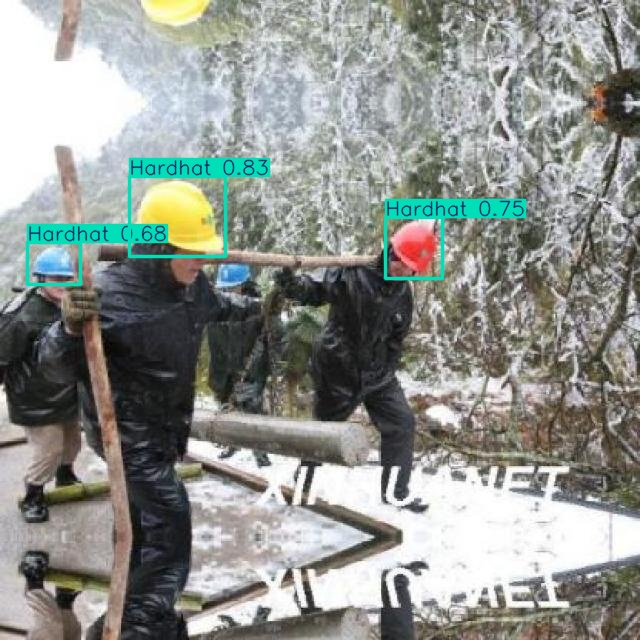

In [21]:
from IPython.display import Image, display  # <-- Tambahkan baris ini di awal!

# 2. Load model hasil training
model = YOLO("runs/detect/train2/weights/best.pt")  # Ganti path jika model Anda berbeda

# 3. Nama file gambar uji
image_path = "coba1.jpg"  # Pastikan file ini sudah diupload di Colab atau ada di working directory

# 4. Lakukan prediksi
results = model.predict(
    source=image_path,  # Gambar uji coba
    save=True,          # Simpan hasil prediksi (annotated image)
    conf=0.3            # Threshold confidence
)

# 5. Ambil path hasil prediksi
predicted_image_path = f"runs/detect/predict/{os.path.basename(image_path)}"

# 6. Tampilkan hasil prediksi
if os.path.exists(predicted_image_path):
    display(Image(filename=predicted_image_path))
else:
    print("Gambar hasil prediksi tidak ditemukan.")

## Visualisasi Hasil Deteksi YOLOv8


image 1/1 /content/coba1.jpg: 640x640 3 Hardhats, 18.2ms
Speed: 5.5ms preprocess, 18.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


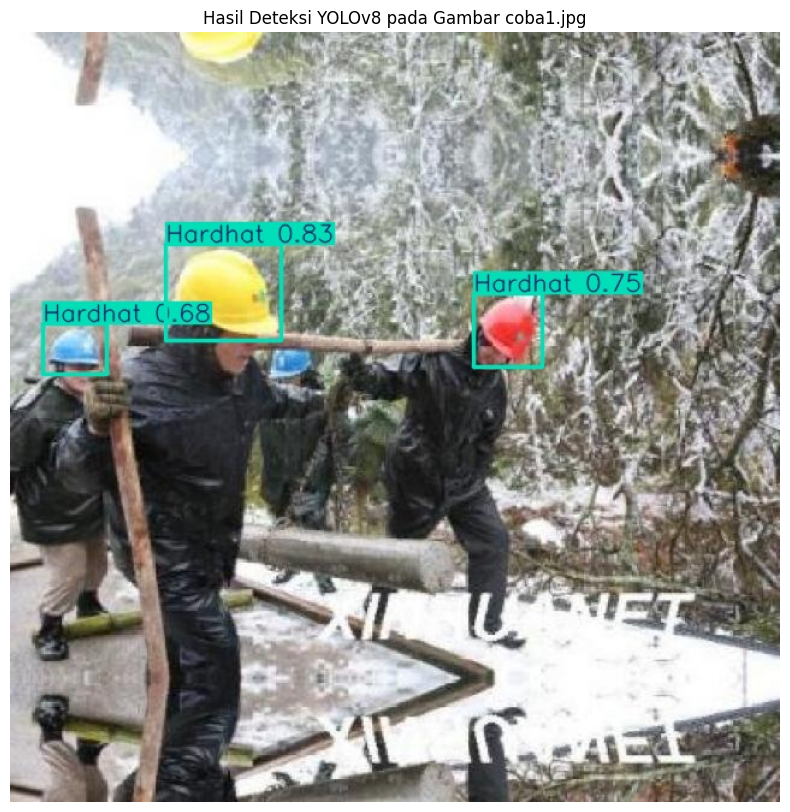

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 2. Load model hasil training
model = YOLO("runs/detect/train2/weights/best.pt")  # Ganti path jika berbeda

# 3. Lakukan prediksi pada gambar coba1.jpg
results = model.predict(
    source="coba1.jpg",  # Pastikan file sudah diupload
    save=True,           # Simpan hasil anotasi
    conf=0.3             # Confidence threshold
)

# 4. Dapatkan path hasil gambar deteksi
result_dir = "runs/detect/predict"
predicted_image_path = os.path.join(result_dir, "coba1.jpg")

# 5. Visualisasi hasil prediksi
if os.path.exists(predicted_image_path):
    img = mpimg.imread(predicted_image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Hasil Deteksi YOLOv8 pada Gambar coba1.jpg")
    plt.show()
else:
    print("Hasil prediksi tidak ditemukan. Pastikan prediksi sudah dijalankan dan file ada.")

In [25]:
import shutil

# Path model hasil training
src = "runs/detect/train2/weights/best.pt"

# Path tujuan sementara untuk diunduh
dst = "/content/best.pt"

# Salin model ke folder /content
shutil.copy(src, dst)

print("Model berhasil disalin ke /content/best.pt")


Model berhasil disalin ke /content/best.pt
